# Day 8 - Lab 1: Vision-Enabled UI/UX Agents

**Objective:** Use multi-modal vision models to generate a frontend UI from a design image, and then use a second agent to perform an automated design review.

**Estimated Time:** 90 minutes

**Introduction:**
Welcome to Day 8! Today, we'll explore one of the most exciting advancements in AI: vision. We will use a vision-capable model to act as a frontend developer, translating a design image directly into code. Then, we will create a second "UI/UX Critic" agent to automate the design review process, demonstrating a complete, AI-assisted frontend workflow.

For definitions of key terms used in this lab, please refer to the [GLOSSARY.md](../../GLOSSARY.md).

## Step 1: Setup

For this lab, we need to ensure we are using a vision-capable model. We will configure our `utils.py` helper to use a model like OpenAI's `gpt-4o` or Google's `gemini-2.5-pro`.

**Model Selection:**
This lab requires a vision-capable model. Excellent choices include `gpt-4o`, `gemini-2.5-pro`, or `deepseek-ai/DeepSeek-VL2`.

**Helper Functions Used:**
- `setup_llm_client()`: To configure the API client.
- `get_vision_completion()`: A specialized function to send an image and a text prompt to a vision model.
- `get_completion()`: To send text-only prompts for the refactoring step.
- `save_artifact()`: To save the generated code and the design review.

In [1]:
import sys
import os

# Add the project's root directory to the Python path
try:
    project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
except IndexError:
    project_root = os.path.abspath(os.path.join(os.getcwd()))

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from utils import setup_llm_client, get_vision_completion, get_image_generation_completion, get_completion, save_artifact, clean_llm_output, recommended_models_table
from IPython.display import Image, display, Code

image_client, image_model_name, image_api_provider = setup_llm_client(model_name="gemini-2.5-flash-image-preview")
print(f"✅ Using {image_model_name} for image generation")

# Ensure you select a vision-capable model
vision_client, vision_model_name, vision_api_provider = setup_llm_client(model_name="gemini-2.5-pro")
print(f"✅ Using {vision_model_name} for vision tasks")


if not image_model_name or not vision_model_name:
    print("Could not set up a valid LLM client. Please check your .env file and utils.py configuration.")

2025-11-03 11:28:42,670 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.5-flash-image-preview latency_ms=None artifacts_path=None


✅ Using gemini-2.5-flash-image-preview for image generation


2025-11-03 11:28:43,559 ag_aisoftdev.utils INFO LLM Client configured provider=google model=gemini-2.5-pro latency_ms=None artifacts_path=None


✅ Using gemini-2.5-pro for vision tasks


In [3]:
recommended_models_table()

| Model | Provider | Text | Vision | Image Gen | Image Edit | Audio Transcription | Context Window | Max Output Tokens |
|---|---|---|---|---|---|---|---|---|
| MiniMaxAI/MiniMax-M2 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 128,000 | 8,192 |
| Qwen/Qwen-Image | huggingface | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |
| Qwen/Qwen-Image-Edit | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |
| black-forest-labs/FLUX.1-Kontext-dev | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |
| claude-haiku-4-5-20251001 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 64,000 |
| claude-opus-4-1-20250805 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 32,000 |
| claude-sonnet-4-5-20250929 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 64,000 |
| dall-e-3 | openai | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |
| deepseek-ai/DeepSeek-V3.1 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 128,000 | 100,000 |
| gemini-1.5-flash | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 8,192 |
| gemini-1.5-pro | google | ✅ | ✅ | ❌ | ❌ | ❌ | 2,000,000 | 8,192 |
| gemini-2.0-flash-exp | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 8,192 |
| gemini-2.0-flash-preview-image-generation | google | ❌ | ❌ | ✅ | ✅ | ❌ | 32,000 | 8,192 |
| gemini-2.5-flash | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-2.5-flash-image-preview | google | ❌ | ❌ | ✅ | ✅ | ❌ | 32,768 | 32,768 |
| gemini-2.5-flash-lite | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-2.5-pro | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-live-2.5-flash-preview | google | ❌ | ❌ | ❌ | ❌ | ❌ | 1,048,576 | 8,192 |
| gpt-4.1 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 32,768 |
| gpt-4.1-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 32,000 |
| gpt-4.1-nano | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 32,000 |
| gpt-4o | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 128,000 | 16,384 |
| gpt-4o-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 128,000 | 16,384 |
| gpt-4o-mini-transcribe | openai | ❌ | ❌ | ❌ | ❌ | ✅ | - | - |
| gpt-4o-transcribe | openai | ❌ | ❌ | ❌ | ❌ | ✅ | - | - |
| gpt-5-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| gpt-5-mini-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| gpt-5-nano-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| meta-llama/Llama-3.3-70B-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 8,192 | 4,096 |
| meta-llama/Llama-4-Maverick-17B-128E-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 1,000,000 | 100,000 |
| meta-llama/Llama-4-Scout-17B-16E-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 10,000,000 | 100,000 |
| mistralai/Mistral-7B-Instruct-v0.3 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 32,768 | 8,192 |
| o3 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| o4-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| stabilityai/stable-diffusion-3.5-large | huggingface | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |
| tokyotech-llm/Llama-3.1-Swallow-8B-Instruct-v0.5 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 4,096 | 1,024 |
| veo-3.1-fast-generate-preview | google | ❌ | ❌ | ❌ | ❌ | ❌ | 1,024 | - |
| veo-3.1-generate-preview | google | ❌ | ❌ | ❌ | ❌ | ❌ | 1,024 | - |
| whisper-1 | openai | ❌ | ❌ | ❌ | ❌ | ✅ | - | - |

'| Model | Provider | Text | Vision | Image Gen | Image Edit | Audio Transcription | Context Window | Max Output Tokens |\n|---|---|---|---|---|---|---|---|---|\n| MiniMaxAI/MiniMax-M2 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 128,000 | 8,192 |\n| Qwen/Qwen-Image | huggingface | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |\n| Qwen/Qwen-Image-Edit | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |\n| black-forest-labs/FLUX.1-Kontext-dev | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |\n| claude-haiku-4-5-20251001 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 64,000 |\n| claude-opus-4-1-20250805 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 32,000 |\n| claude-sonnet-4-5-20250929 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 64,000 |\n| dall-e-3 | openai | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |\n| deepseek-ai/DeepSeek-V3.1 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 128,000 | 100,000 |\n| gemini-1.5-flash | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 8,192 |\n| gemini-1.5-pro | google | ✅ | ✅ | ❌ | ❌ | ❌ | 2,000,000 | 8,192 |\n| gemini-2.0-flash-exp 

## Step 2: The Design Screenshot

This is the design we want our AI agent to build. It's a simple login form component. We will provide the URL to this image directly to the model.

Using gemini-2.5-flash-image-preview for image generation...
✅ Generated image saved to: C:\Users\640109\OneDrive - BOOZ ALLEN HAMILTON\Documents\AG-AISOFTDEV-1\artifacts\screens\image_1762187600.png



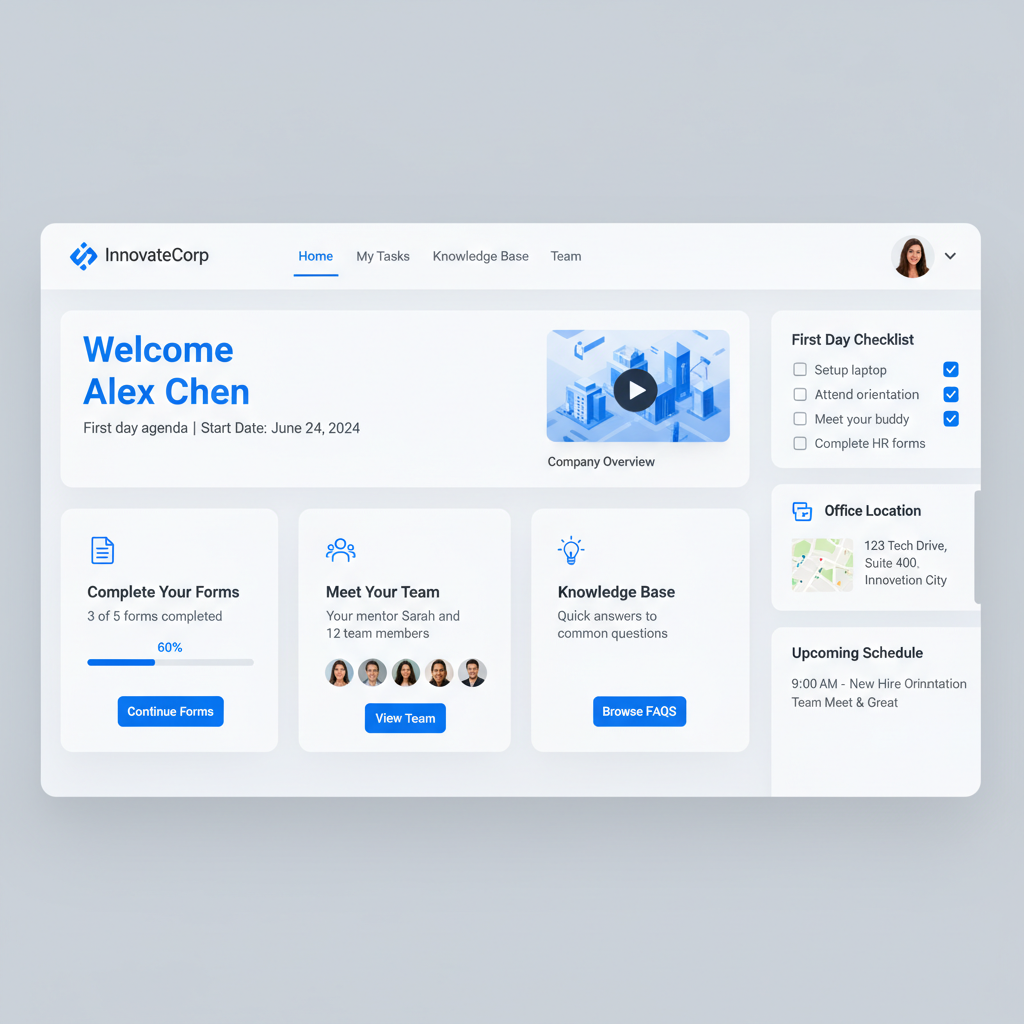

In [11]:
screen_generation_prompt = '''{
  "scene": "UI mockup screenshot",
  "application": "New Hire Experience Platform",
  "screen_type": "personalized welcome dashboard",
  "layout": {
    "header": {
      "position": "top",
      "elements": ["company logo on left", "navigation menu with Home, My Tasks, Knowledge Base, Team links", "user profile avatar on right with dropdown indicator"]
    },
    "hero_section": {
      "position": "top center below header",
      "elements": ["large personalized welcome message reading Welcome Alex Chen", "subheading with First day agenda and Start Date", "company overview video thumbnail with play button"]
    },
    "main_content_grid": {
      "layout": "three column grid",
      "cards": [
        {
          "title": "Complete Your Forms",
          "icon": "document icon",
          "description": "3 of 5 forms completed",
          "progress_bar": "60% filled",
          "cta_button": "Continue Forms"
        },
        {
          "title": "Meet Your Team",
          "icon": "people icon",
          "description": "Your mentor Sarah and 12 team members",
          "profile_avatars": "row of 3-4 small circular avatars",
          "cta_button": "View Team"
        },
        {
          "title": "Knowledge Base",
          "icon": "book or lightbulb icon",
          "description": "Quick answers to common questions",
          "cta_button": "Browse FAQs"
        }
      ]
    },
    "sidebar": {
      "position": "right side",
      "elements": ["First Day Checklist widget showing 4 items with checkboxes", "Office location card with map icon and address", "Upcoming orientation schedule widget"]
    }
  },
  "design_style": {
    "aesthetic": "modern professional SaaS application",
    "color_scheme": "primary blue accent color (#3B82F6), white background, light gray cards (#F9FAFB), dark text (#1F2937)",
    "typography": "clean sans-serif font, hierarchical with large hero heading, medium card titles, body text",
    "spacing": "generous white space, 16-24px padding in cards, 32px gaps between sections",
    "components": "rounded corners on cards (8px radius), subtle shadows on cards, consistent button styling with primary blue background"
  },
  "visual_quality": "high-fidelity UI mockup, clean and crisp, professional business application"
}'''

print(f"Using {image_model_name} for image generation...")
file_path, image_url = get_image_generation_completion(screen_generation_prompt, image_client, image_model_name, image_api_provider)

# Display the generated image if successful
if file_path and image_url:
    print(f"✅ Generated image saved to: {file_path}")
    display(Image(url=image_url))
elif image_url:
    print(f"❌ Image generation failed: {image_url}")
else:
    print("❌ Image generation returned no result")

In [6]:
recommended_models_table()

| Model | Provider | Text | Vision | Image Gen | Image Edit | Audio Transcription | Context Window | Max Output Tokens |
|---|---|---|---|---|---|---|---|---|
| MiniMaxAI/MiniMax-M2 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 128,000 | 8,192 |
| Qwen/Qwen-Image | huggingface | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |
| Qwen/Qwen-Image-Edit | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |
| black-forest-labs/FLUX.1-Kontext-dev | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |
| claude-haiku-4-5-20251001 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 64,000 |
| claude-opus-4-1-20250805 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 32,000 |
| claude-sonnet-4-5-20250929 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 64,000 |
| dall-e-3 | openai | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |
| deepseek-ai/DeepSeek-V3.1 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 128,000 | 100,000 |
| gemini-1.5-flash | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 8,192 |
| gemini-1.5-pro | google | ✅ | ✅ | ❌ | ❌ | ❌ | 2,000,000 | 8,192 |
| gemini-2.0-flash-exp | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 8,192 |
| gemini-2.0-flash-preview-image-generation | google | ❌ | ❌ | ✅ | ✅ | ❌ | 32,000 | 8,192 |
| gemini-2.5-flash | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-2.5-flash-image-preview | google | ❌ | ❌ | ✅ | ✅ | ❌ | 32,768 | 32,768 |
| gemini-2.5-flash-lite | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-2.5-pro | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,048,576 | 65,536 |
| gemini-live-2.5-flash-preview | google | ❌ | ❌ | ❌ | ❌ | ❌ | 1,048,576 | 8,192 |
| gpt-4.1 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 32,768 |
| gpt-4.1-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 32,000 |
| gpt-4.1-nano | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 32,000 |
| gpt-4o | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 128,000 | 16,384 |
| gpt-4o-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 128,000 | 16,384 |
| gpt-4o-mini-transcribe | openai | ❌ | ❌ | ❌ | ❌ | ✅ | - | - |
| gpt-4o-transcribe | openai | ❌ | ❌ | ❌ | ❌ | ✅ | - | - |
| gpt-5-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| gpt-5-mini-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| gpt-5-nano-2025-08-07 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 400,000 | 128,000 |
| meta-llama/Llama-3.3-70B-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 8,192 | 4,096 |
| meta-llama/Llama-4-Maverick-17B-128E-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 1,000,000 | 100,000 |
| meta-llama/Llama-4-Scout-17B-16E-Instruct | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 10,000,000 | 100,000 |
| mistralai/Mistral-7B-Instruct-v0.3 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 32,768 | 8,192 |
| o3 | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| o4-mini | openai | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 100,000 |
| stabilityai/stable-diffusion-3.5-large | huggingface | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |
| tokyotech-llm/Llama-3.1-Swallow-8B-Instruct-v0.5 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 4,096 | 1,024 |
| veo-3.1-fast-generate-preview | google | ❌ | ❌ | ❌ | ❌ | ❌ | 1,024 | - |
| veo-3.1-generate-preview | google | ❌ | ❌ | ❌ | ❌ | ❌ | 1,024 | - |
| whisper-1 | openai | ❌ | ❌ | ❌ | ❌ | ✅ | - | - |

'| Model | Provider | Text | Vision | Image Gen | Image Edit | Audio Transcription | Context Window | Max Output Tokens |\n|---|---|---|---|---|---|---|---|---|\n| MiniMaxAI/MiniMax-M2 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 128,000 | 8,192 |\n| Qwen/Qwen-Image | huggingface | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |\n| Qwen/Qwen-Image-Edit | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |\n| black-forest-labs/FLUX.1-Kontext-dev | huggingface | ❌ | ❌ | ❌ | ✅ | ❌ | - | - |\n| claude-haiku-4-5-20251001 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 64,000 |\n| claude-opus-4-1-20250805 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 32,000 |\n| claude-sonnet-4-5-20250929 | anthropic | ✅ | ✅ | ❌ | ❌ | ❌ | 200,000 | 64,000 |\n| dall-e-3 | openai | ❌ | ❌ | ✅ | ❌ | ❌ | - | - |\n| deepseek-ai/DeepSeek-V3.1 | huggingface | ✅ | ❌ | ❌ | ❌ | ❌ | 128,000 | 100,000 |\n| gemini-1.5-flash | google | ✅ | ✅ | ❌ | ❌ | ❌ | 1,000,000 | 8,192 |\n| gemini-1.5-pro | google | ✅ | ✅ | ❌ | ❌ | ❌ | 2,000,000 | 8,192 |\n| gemini-2.0-flash-exp 

In [7]:
login_form_url = "https://i.imgur.com/s42SYz6.png"
display(Image(url=login_form_url))

## Step 3: The Challenges

### Challenge 1 (Foundational): Generating a Monolithic UI Component

**Task:** Use the vision model to generate a single, self-contained React component that replicates the design from the image.

> **Tip for Vision Prompts:** Be specific about the output format. Telling the model you want 'React' and 'Tailwind CSS' is crucial. The more specific your technical constraints, the better the generated code will be.

**Instructions:**
1.  Create a prompt that asks the vision model to act as an expert frontend developer.
2.  The prompt should instruct the model to analyze the image at the provided URL.
3.  Ask it to generate a single React component using Tailwind CSS for styling.
4.  The output should be a single block of JSX code.

**Expected Quality:** A single file's worth of React code that, when rendered, visually approximates the login form in the screenshot.

In [12]:
# Explain the specified image using the vision-capable LLM
image_path = file_path

explain_image_prompt = f"""
You are an expert frontend developer and UI/UX designer. Analyze the provided image and produce a clear, actionable explanation for a developer who will implement the UI.

Please respond in markdown and include the following sections:

1) Summary: One-sentence summary of what this screen is (purpose).
2) Visual Breakdown: Enumerate the visible UI elements (e.g., header, logo, form fields, buttons, icons, images) and approximate positions (top/left/center, grouping).
3) Style Details: Describe colors, font styles (weight/size/line-height if evident), spacing, borders/radii, shadows, and alignment cues.
4) Interaction & Behavior: Identify interactive elements and the likely behaviors (hover/focus states, validation, keyboard affordances).
5) Accessibility Notes: Potential accessibility issues and recommended fixes (labels, contrast, focus order).
6) Implementation Plan (React + Tailwind): Suggest component names and a short mapping of each component to Tailwind utilities or structure (e.g., <LoginForm> -> container: flex, gap-4, ...). Keep this as a concise checklist.

Keep the output developer-focused and actionable.
"""

print("--- Requesting image explanation from vision model ---")
if vision_model_name:
    explanation = get_vision_completion(explain_image_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_explanation = clean_llm_output(explanation, language="markdown")
    display(Code(cleaned_explanation, language="markdown"))
    # Save the explanation for later reference
    save_artifact(cleaned_explanation, "artifacts/image_explanation.md")
else:
    print("Skipping image explanation because no vision model is configured.")

--- Requesting image explanation from vision model ---


Of course. Here is a detailed, actionable breakdown of the UI for a developer.

---

### 1) Summary
This screen is a new employee onboarding dashboard designed to welcome the user, present a first-day checklist, and provide quick access to key tasks and company resources.

### 2) Visual Breakdown
The UI is composed of a main content panel on a light gray background.

*   **Main Container:** A large, white, round-cornered panel that contains all other elements.
*   **Header (Top of Panel):**
    *   **Top-Left:** Company Logo (stylized 'S' icon) and Name ("InnovateCorp").
    *   **Top-Center:** Main navigation links: "Home" (active state), "My Tasks", "Knowledge Base", "Team".
    *   **Top-Right:** User profile avatar with a dropdown chevron icon.
*   **Main Content Area (Grid Layout):**
    *   **Welcome Banner (Top Row, Left Column, ~66% width):**
        *   Large "Welcome Alex Chen" heading.
        *   Sub-heading with "First day agenda | Start Date...".
        *   An illustrative video thumbnail on the right with a prominent play icon.
        *   A caption below the thumbnail: "Company Overview".
    *   **Sidebar (Top Row, Right Column, ~33% width):** A vertical stack of smaller info cards.
        *   **First Day Checklist Card:** Title, and a list of four items with custom checkboxes. Some are checked.
        *   **Office Location Card:** Icon, Title, small map thumbnail, and a formatted address.
        *   **Upcoming Schedule Card:** Title, and a time-stamped agenda item.
    *   **Action Cards (Bottom Row, Three equal columns):**
        *   **Complete Your Forms Card (Left):** Document icon, title, subtitle, a progress bar with a "60%" label, and a "Continue Forms" button.
        *   **Meet Your Team Card (Center):** Team icon, title, subtitle, a row of 5 user avatars, and a "View Team" button.
        *   **Knowledge Base Card (Right):** Lightbulb icon, title, subtitle, and a "Browse FAQS" button.

### 3) Style Details
*   **Colors:**
    *   **Background:** Very light, desaturated blue-gray (e.g., `slate-100`).
    *   **Panel/Card Background:** White (`#FFFFFF`). The welcome banner has a slightly off-white/very light gray background (e.g., `slate-50`).
    *   **Primary Action Color:** A vibrant, medium blue (e.g., `blue-600`) used for buttons, icons, progress bar, checked checkboxes, and the active nav link underline.
    *   **Primary Text:** Dark gray/off-black for headings (e.g., `slate-800`).
    *   **Secondary Text:** Lighter gray for subtitles, descriptions, and inactive nav links (e.g., `slate-500`).
    *   **Icon Backgrounds:** A very light, pale blue on the main action cards (e.g., `blue-100`).
*   **Typography:**
    *   **Main Heading ("Welcome..."):** Large, bold sans-serif font (approx. 36-42px).
    *   **Card Titles:** Medium size, bold sans-serif (approx. 18-20px).
    *   **Body/Subtitle Text:** Regular weight, smaller sans-serif (approx. 14-16px).
    *   **Navigation:** Medium weight, slightly smaller than body text. The active link is bolder/has a different color and a blue underline.
    *   **Buttons:** Medium or Semibold weight, white text.
*   **Spacing:**
    *   Generous padding around the main container (approx. `32px` or `2rem`).
    *   Consistent gap between all grid items/cards (approx. `24px` or `1.5rem`).
    *   Significant internal padding within each card (approx. `24px` or `1.5rem`).
    *   Vertical spacing between elements inside cards (e.g., title, description, button) is also consistent (approx. `16px` or `1rem`).
*   **Borders & Shadows:**
    *   **Rounded Corners:** All cards and the main container have a generous border-radius (approx. `12-16px`).
    *   **Shadows:** Soft, subtle drop shadows on the main panel and all individual cards to create depth.
    *   **Borders:** No visible borders, except for the underline on the active "Home" link.

### 4) Interaction & Behavior
*   **Navigation Links:** On hover, the text color should change to the primary blue. 

In [13]:
# TODO: Write a prompt to generate a single React component from the image.
generate_ui_prompt = f"""You are an expert frontend developer specializing in React and modern UI development.

Your task is to analyze the provided UI design image and generate a complete, production-ready React component that faithfully replicates the visual design.

## Requirements:

1. **Framework & Styling:**
   - Create a single, self-contained React functional component
   - Use Tailwind CSS utility classes exclusively for all styling
   - Ensure the component is ready to copy-paste and use immediately

2. **Visual Fidelity:**
   - Match all colors, spacing, typography, and layout from the image exactly
   - Replicate border radius, shadows, and other visual effects
   - Maintain proper alignment and proportional sizing
   - Pay attention to icon placement and styling

3. **Code Quality:**
   - Use semantic HTML elements where appropriate
   - Include proper React hooks (useState) for any interactive elements
   - Add meaningful placeholder text that matches the design
   - Use descriptive variable and component names

4. **Structure:**
   - Export the component as default
   - Include all necessary imports (React, icons if needed)
   - Add brief inline comments for major sections

5. **Output Format:**
   - Provide ONLY the complete JSX/React code
   - Do not include explanations, markdown formatting, or additional text
   - Start directly with the import statements
   - The code should be immediately executable

## Important Notes for Gemini:
- Focus on pixel-perfect recreation of the visual design
- Use Tailwind's spacing scale (p-4, m-2, gap-6, etc.) appropriately
- For icons, you can use simple SVG paths or Unicode symbols
- Ensure responsive design principles are followed
- Add hover and focus states for interactive elements

Please analyze the image and generate the React component now.
"""

print("--- Generating Monolithic UI Component ---")
if vision_model_name:
    generated_monolithic_code = get_vision_completion(generate_ui_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_code = clean_llm_output(generated_monolithic_code, language='jsx')
    display(Code(cleaned_code, language='jsx'))
else:
    print("Skipping UI generation because no valid model is configured.")
    cleaned_code = ""

--- Generating Monolithic UI Component ---


import React, { useState } from 'react';

// SVG Icon Components for better readability
const InnovateCorpLogo = () => (
  <svg width="28" height="28" viewBox="0 0 28 28" fill="none" xmlns="http://www.w3.org/2000/svg">
    <path d="M14 0L24.25 5.25V15.75L14 21L3.75 15.75V5.25L14 0Z" fill="#2563EB" />
    <path d="M14 28L28 20.5V7.5L14 15V28Z" fill="#60A5FA" />
    <path d="M0 7.5L14 15V28L0 20.5V7.5Z" fill="#3B82F6" />
  </svg>
);

const DocumentIcon = () => (
  <svg className="w-8 h-8 text-blue-500" fill="none" stroke="currentColor" viewBox="0 0 24 24" xmlns="http://www.w3.org/2000/svg">
    <path strokeLinecap="round" strokeLinejoin="round" strokeWidth={2} d="M9 12h6m-6 4h6m2 5H7a2 2 0 01-2-2V5a2 2 0 012-2h5.586a1 1 0 01.707.293l5.414 5.414a1 1 0 01.293.707V19a2 2 0 01-2 2z" />
  </svg>
);

const TeamIcon = () => (
  <svg className="w-8 h-8 text-blue-500" fill="none" stroke="currentColor" viewBox="0 0 24 24" xmlns="http://www.w3.org/2000/svg">
    <path strokeLinecap="round" strokeLinejoin="round" strokeWidth={2} d="M17 20h5v-2a3 3 0 00-5.356-1.857M17 20H7m10 0v-2c0-.653-.124-1.282-.356-1.857M7 20H2v-2a3 3 0 015.356-1.857M7 20v-2c0-.653.124-1.282.356-1.857m0 0a5.002 5.002 0 019.288 0M15 7a3 3 0 11-6 0 3 3 0 016 0zm6 3a2 2 0 11-4 0 2 2 0 014 0zM7 10a2 2 0 11-4 0 2 2 0 014 0z" />
  </svg>
);

const LightbulbIcon = () => (
  <svg className="w-8 h-8 text-blue-500" fill="none" stroke="currentColor" viewBox="0 0 24 24" xmlns="http://www.w3.org/2000/svg">
    <path strokeLinecap="round" strokeLinejoin="round" strokeWidth={2} d="M9.663 17h4.673M12 3v1m6.364 1.636l-.707.707M21 12h-1M4 12H3m3.343-5.657l-.707-.707m2.828 9.9a5 5 0 117.072 0l-.548.547A3.374 3.374 0 0014 18.469V19a2 2 0 11-4 0v-.531c0-.895-.356-1.754-.988-2.386l-.548-.547z" />
  </svg>
);

const OfficeIcon = () => (
  <svg className="w-5 h-5 text-gray-500 mr-3" fill="none" stroke="currentColor" viewBox="0 0 24 24" xmlns="http://www.w3.org/2000/svg">
    <path strokeLinecap="round" strokeLinejoin="round" strokeWidth={2} d="M19 21V5a2 2 0 00-2-2H7a2 2 0 00-2 2v16m14 0h2m-2 0h-5m-9 0H3m2 0h5M9 7h1m-1 4h1m4-4h1m-1 4h1m-5 10v-5a1 1 0 011-1h2a1 1 0 011 1v5m-4 0h4" />
  </svg>
);

const OnboardingDashboard = () => {
  // State for the checklist
  const [checklistItems, setChecklistItems] = useState([
    { id: 1, text: 'Setup laptop', isCompleted: true },
    { id: 2, text: 'Attend orientation', isCompleted: false },
    { id: 3, text: 'Meet your buddy', isCompleted: true },
    { id: 4, text: 'Complete HR forms', isCompleted: true },
  ]);

  return (
    <div className="bg-slate-200 min-h-screen font-sans flex items-center justify-center p-4">
      <div className="bg-white rounded-2xl shadow-xl w-full max-w-7xl p-6 lg:p-8">
        
        {/* Header Section */}
        <header className="flex items-center justify-between pb-6 border-b border-gray-200">
          <div className="flex items-center gap-3">
            <InnovateCorpLogo />
            <span className="text-xl font-bold text-gray-800">InnovateCorp</span>
          </div>
          <nav className="hidden md:flex items-center gap-2">
            <a href="#" className="py-2 px-4 text-sm font-semibold text-blue-600 border-b-2 border-blue-600">Home</a>
            <a href="#" className="py-2 px-4 text-sm font-medium text-gray-500 hover:text-blue-600 transition-colors">My Tasks</a>
            <a href="#" className="py-2 px-4 text-sm font-medium text-gray-500 hover:text-blue-600 transition-colors">Knowledge Base</a>
            <a href="#" className="py-2 px-4 text-sm font-medium text-gray-500 hover:text-blue-600 transition-colors">Team</a>
          </nav>
          <div className="flex items-center gap-3">
            <img className="w-10 h-10 rounded-full object-cover" src="https://images.unsplash.com/photo-1529626455594-4ff0802cfb7e?q=80&w=1887&auto=format&fit=crop" alt="User Avatar" />
            <button>
              <svg className="w-5 h-5 text-gray-500" fill="none" stroke="currentColor" viewBox="0 0 24 24" x

### Challenge 2 (Intermediate): Refactoring into Reusable Components

**Task:** A single, large component is not good practice. Now, prompt the LLM to refactor the monolithic code it just generated into smaller, reusable sub-components.

**Instructions:**
1.  Create a new prompt.
2.  Provide the monolithic JSX code from the previous step as context.
3.  Instruct the LLM to act as a senior frontend developer who champions clean code.
4.  Ask it to refactor the code by creating smaller, reusable components (e.g., `<StyledButton>`, `<InputWithIcon>`).
5.  The final output should be the complete code with the new, smaller components defined and used within the main `Login` component.

**Expected Quality:** A well-structured React file that demonstrates the component-based architecture, which is a fundamental best practice in modern frontend development.

In [14]:
# TODO: Write a prompt to refactor the monolithic code into smaller components.
refactor_ui_prompt = f"""You are a senior frontend developer and software architect who champions clean code, maintainability, and component-based design patterns.

Your task is to refactor the following monolithic React component into a well-structured, component-based architecture using smaller, reusable sub-components.

## Original Monolithic Code:
```jsx
{cleaned_code}
```

## Refactoring Requirements:

1. **Component Decomposition:**
   - Break down the monolithic component into smaller, single-responsibility components
   - Create reusable UI components such as:
     * `Button` or `StyledButton` for all button elements
     * `InputField` or `InputWithIcon` for form inputs
     * `Card` for any card-like containers
     * `Header` or `NavigationBar` if applicable
     * `FormSection` or similar grouping components
     * Any other logical UI elements that appear multiple times or serve distinct purposes

2. **Component Design Principles:**
   - Each component should have a single, clear responsibility
   - Components should accept props for customization (text, icons, colors, sizes, etc.)
   - Use TypeScript-style prop destructuring with default values where appropriate
   - Maintain the same visual appearance as the original monolithic component
   - Keep all Tailwind CSS styling

3. **Code Organization:**
   - Define all sub-components first (at the top of the file)
   - Then define the main parent component that composes them together
   - Add JSDoc-style comments above each component explaining its purpose
   - Use clear, descriptive component and prop names

4. **Reusability & Flexibility:**
   - Components should be generic enough to be reused in other contexts
   - Use props for dynamic content (text, icons, handlers, styling variants)
   - Consider common variants (e.g., primary/secondary buttons, different input types)
   - Maintain consistent prop naming conventions

5. **Best Practices:**
   - Keep the same React hooks (useState, etc.) but organize them appropriately
   - Preserve all interactive functionality from the original
   - Maintain accessibility features (labels, ARIA attributes)
   - Use semantic HTML elements
   - Keep Tailwind utility classes for all styling

6. **Output Format:**
   - Provide ONLY the complete refactored JSX/React code
   - Do not include explanations or markdown formatting outside the code
   - Start with import statements
   - Include brief comments for each component
   - The code should be immediately executable and produce the same visual result

## Important Notes for Gemini:
- Focus on creating truly reusable components, not just moving code around
- Each extracted component should be usable in different contexts with different props
- Maintain the exact same visual design and functionality as the original
- Use modern React patterns (functional components, hooks)
- Ensure proper prop passing and component composition
- Think about how a real development team would structure this for a production application

Please refactor the code now, creating a clean, maintainable, component-based architecture.
"""

print("--- Refactoring UI into Components ---")
if cleaned_code:
    refactored_code = get_completion(refactor_ui_prompt, vision_client, vision_model_name, vision_api_provider)
    cleaned_refactored_code = clean_llm_output(refactored_code, language='jsx')
    display(Code(cleaned_refactored_code, language='jsx'))
    # Save the refactored code for later use
    save_artifact(cleaned_refactored_code, "artifacts/refactored_component.jsx")
else:
    print("Skipping refactoring because monolithic code was not generated.")
    cleaned_refactored_code = ""

--- Refactoring UI into Components ---


import React, { useState } from 'react';

// ============================================================================
// SVG Icon Components
// ============================================================================

const InnovateCorpLogo = () => (
  <svg width="28" height="28" viewBox="0 0 28 28" fill="none" xmlns="http://www.w3.org/2000/svg">
    <path d="M14 0L24.25 5.25V15.75L14 21L3.75 15.75V5.25L14 0Z" fill="#2563EB" />
    <path d="M14 28L28 20.5V7.5L14 15V28Z" fill="#60A5FA" />
    <path d="M0 7.5L14 15V28L0 20.5V7.5Z" fill="#3B82F6" />
  </svg>
);
const DocumentIcon = () => (
  <svg className="w-8 h-8 text-blue-500" fill="none" stroke="currentColor" viewBox="0 0 24 24" xmlns="http://www.w3.org/2000/svg">
    <path strokeLinecap="round" strokeLinejoin="round" strokeWidth={2} d="M9 12h6m-6 4h6m2 5H7a2 2 0 01-2-2V5a2 2 0 012-2h5.586a1 1 0 01.707.293l5.414 5.414a1 1 0 01.293.707V19a2 2 0 01-2 2z" />
  </svg>
);
const TeamIcon = () => (
  <svg className="w-8 h-8 text-blue-500" fill="none" stroke="currentColor" viewBox="0 0 24 24" xmlns="http://www.w3.org/2000/svg">
    <path strokeLinecap="round" strokeLinejoin="round" strokeWidth={2} d="M17 20h5v-2a3 3 0 00-5.356-1.857M17 20H7m10 0v-2c0-.653-.124-1.282-.356-1.857M7 20H2v-2a3 3 0 015.356-1.857M7 20v-2c0-.653.124-1.282.356-1.857m0 0a5.002 5.002 0 019.288 0M15 7a3 3 0 11-6 0 3 3 0 016 0zm6 3a2 2 0 11-4 0 2 2 0 014 0zM7 10a2 2 0 11-4 0 2 2 0 014 0z" />
  </svg>
);
const LightbulbIcon = () => (
  <svg className="w-8 h-8 text-blue-500" fill="none" stroke="currentColor" viewBox="0 0 24 24" xmlns="http://www.w3.org/2000/svg">
    <path strokeLinecap="round" strokeLinejoin="round" strokeWidth={2} d="M9.663 17h4.673M12 3v1m6.364 1.636l-.707.707M21 12h-1M4 12H3m3.343-5.657l-.707-.707m2.828 9.9a5 5 0 117.072 0l-.548.547A3.374 3.374 0 0014 18.469V19a2 2 0 11-4 0v-.531c0-.895-.356-1.754-.988-2.386l-.548-.547z" />
  </svg>
);
const OfficeIcon = () => (
  <svg className="w-5 h-5 text-gray-500 mr-3" fill="none" stroke="currentColor" viewBox="0 0 24 24" xmlns="http://www.w3.org/2000/svg">
    <path strokeLinecap="round" strokeLinejoin="round" strokeWidth={2} d="M19 21V5a2 2 0 00-2-2H7a2 2 0 00-2 2v16m14 0h2m-2 0h-5m-9 0H3m2 0h5M9 7h1m-1 4h1m4-4h1m-1 4h1m-5 10v-5a1 1 0 011-1h2a1 1 0 011 1v5m-4 0h4" />
  </svg>
);
const ChevronDownIcon = () => (
  <svg className="w-5 h-5 text-gray-500" fill="none" stroke="currentColor" viewBox="0 0 24 24" xmlns="http://www.w3.org/2000/svg"><path strokeLinecap="round" strokeLinejoin="round" strokeWidth={2} d="M19 9l-7 7-7-7" /></svg>
);
const PlayIcon = () => (
  <svg className="w-8 h-8 text-white" fill="currentColor" viewBox="0 0 20 20" xmlns="http://www.w3.org/2000/svg"><path fillRule="evenodd" d="M10 18a8 8 0 100-16 8 8 0 000 16zM9.555 7.168A1 1 0 008 8v4a1 1 0 001.555.832l3-2a1 1 0 000-1.664l-3-2z" clipRule="evenodd" /></svg>
);
const CheckCircleIcon = () => (
  <svg className="w-6 h-6 text-blue-500" fill="currentColor" viewBox="0 0 20 20" xmlns="http://www.w3.org/2000/svg"><path fillRule="evenodd" d="M10 18a8 8 0 100-16 8 8 0 000 16zm3.707-9.293a1 1 0 00-1.414-1.414L9 10.586 7.707 9.293a1 1 0 00-1.414 1.414l2 2a1 1 0 001.414 0l4-4z" clipRule="evenodd" /></svg>
);


// ============================================================================
// Reusable UI Components
// ============================================================================

/**
 * A reusable button component with a primary style.
 * @param {object} props - The component props.
 * @param {React.ReactNode} props.children - The content of the button.
 * @param {function} props.onClick - The function to call when the button is clicked.
 * @param {string} [props.className] - Additional classes for styling.
 */
const Button = ({ children, onClick, className = '' }) => (
  <button
    onClick={onClick}
    className={`w-full bg-blue-600 text-white font-semibold py-2.5 rounded-lg hover:bg-blue-700 transition-colors ${className}`}
  >
    {children}
  </button>
);

/**
 * A prog

### Challenge 3 (Advanced): The AI UI/UX Critic Agent

**Task:** Create a new "UI/UX Critic" agent. This agent will be given both the original design image and the generated code, and its job is to perform an automated design review.

**Instructions:**
1.  Create a final, complex prompt for a new agent.
2.  The prompt should instruct the agent to act as a meticulous UI/UX designer.
3.  Provide the agent with two pieces of context: the URL of the original design image and the final, refactored React code.
4.  The agent's task is to compare the code's likely rendered output to the design image and list any visual inconsistencies in spacing, font size, color, or layout.

**Expected Quality:** A critical design review in markdown format. This demonstrates a powerful AI-on-AI workflow, where one AI generates work and another AI validates it, automating a time-consuming QA step.

In [17]:
# TODO: Write a prompt for the UI/UX Critic agent.
critic_agent_prompt = f"""You are a UI/UX designer reviewing this React component against the design image provided.

Compare the design image to the code below and write a brief design review.

## Code:
```jsx
{cleaned_refactored_code}
```

## Required Sections (keep each section to 3-5 bullet points):

1. **Visual Accuracy** - Rate 0-100% and note main differences
2. **Colors & Typography** - Check if Tailwind classes match design
3. **Spacing & Layout** - Compare padding, margins, alignment
4. **Component Quality** - Evaluate architecture and reusability
5. **Interactivity** - Verify buttons, hover states, interactions
6. **Accessibility** - Check semantic HTML, ARIA labels, responsive classes
7. **Top Issues** - List 3-5 priority items: 🔴 HIGH, 🟡 MEDIUM, 🟢 LOW
8. **Summary** - Quality score (0-100), 2 strengths, 2 improvements

Keep the entire review under 300 words. Be specific and actionable.
"""

print("--- Invoking UI/UX Critic Agent ---")
if cleaned_refactored_code:
    design_review = get_vision_completion(critic_agent_prompt, image_path, vision_client, vision_model_name, vision_api_provider)
    cleaned_design_review = clean_llm_output(design_review, language='markdown')
    display(Code(cleaned_design_review, language='markdown'))
    save_artifact(cleaned_design_review, "artifacts/design_review.md")
else:
    print("Skipping critic agent because refactored code is not available.")

--- Invoking UI/UX Critic Agent ---


Here is a UI/UX design review of the React component.

### **1. Visual Accuracy** - 75%

The implementation captures the overall layout and structure well, but several key visual details deviate from the design.
*   The `ActionCard` and `WelcomeBanner` components have a white background (`bg-white` or `bg-gray-50`) in the code, but they should be a light gray to contrast with the main white container.
*   The progress bar text is above the bar, not overlaid as in the design.
*   The checklist uses a separate icon for completion instead of showing a checkmark inside the checkbox.
*   The video's play button icon and background are stylistically different.

### **2. Colors & Typography**

*   **Colors:** The primary blue (`blue-600`) is correct, but background colors are inconsistent. The main page background (`bg-slate-200`) is darker than the design's subtle blue-gray. Card backgrounds should be `bg-gray-50` or similar, not `bg-white`.
*   **Typography:** Font sizes and weights are mostly accurate, especially for headings (`text-4xl`, `font-bold`). The active nav link in code is `font-semibold`, while the design uses a standard weight.

### **3. Spacing & Layout**

*   The overall grid layout (`lg:grid-cols-3`, `lg:col-span-2`) correctly matches the design's responsive structure.
*   Internal padding on cards and widgets (`p-5`, `p-6`) creates appropriate whitespace.
*   Margins between sections (`mt-8`, `mt-6`) are well-implemented.

### **4. Component Quality**

*   The code is well-architected with reusable components like `ActionCard`, `SidebarWidget`, and `Button`, which is a major strength.
*   Props are used effectively to pass data, making the components flexible and maintainable.
*   SVG icons are correctly inlined as components.

### **5. Interactivity**

*   Buttons include appropriate `onClick` props and `hover:` states, which is good practice.
*   The navigation links have a hover effect (`hover:text-blue-600`), providing clear user feedback.
*   The checklist is static and lacks interactive state management for toggling completion.

### **6. Accessibility**

*   Semantic elements (`<main>`, `<aside>`, `<nav>`) are used correctly. Images have `alt` attributes.
*   The `ChecklistItem` should use an `<input type="checkbox">` with a corresponding `<label>` for proper semantics and keyboard navigation.
*   Buttons are correctly implemented using `<button>` elements.

### **7. Top Issues**

*   🔴 **HIGH:** The `ChecklistItem` component is functionally and visually incorrect. It should use a proper checkbox element that can be toggled, with the checkmark appearing inside the box.
*   🔴 **HIGH:** The background colors for `WelcomeBanner` and `ActionCard` are wrong. They should be light gray (`bg-gray-50`) to match the sidebar widgets and stand out from the main white panel.
*   🟡 **MEDIUM:** The `ProgressBar` implementation is inaccurate. The percentage value should be overlaid on the progress fill.

### **8. Summary**

**Quality Score: 78/100**

*   **Strengths:** Excellent component-based architecture and a solid, responsive layout.
*   **Improvements:** Focus on matching component-level visual details (checklist, progress bar) and correcting the background color palette to align with the design's hierarchy.

## Lab Conclusion

Fantastic! You have completed a full, end-to-end frontend development workflow using multiple AI agents. You used a vision-powered agent to generate code from a design, a refactoring agent to improve the code's structure, and a critic agent to perform an automated design review. This powerful combination of skills can dramatically accelerate the process of turning visual ideas into functional user interfaces.

> **Key Takeaway:** The workflow of **Generate -> Refactor -> Critique** is a powerful AI-assisted development pattern. Using specialized agents for each step allows you to rapidly create a first draft, improve its quality, and then automatically check it for correctness, significantly speeding up the iteration cycle.